## Radios en Circuitos

**En esta notebook se usan los archivos:**

Radios censales 2010 por IGN

- `radios = './radios_IGN_2010_WGS84/'`

Circuitos compilados por Tartagalensis en base a CNE

- `circuitos_ARG = './mapaelectoral/circuitos-CNE-TTGL.geojson'`

Geometrías de Dptos y Provincias de IGN

- `dptos_url = 'https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcación/Límites/departamento/json'`

- `provs_url = 'https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcación/Límites/provincia/json'`


**Y se generan los archivos:**

Secciones según circuitos de Tartagalensis - CNE

```python
prov_dpto_IN1[['codprov', 'coddepto', 'IN1']].to_csv('./info/secciones_departamentos-TTGL.csv', index=False)

ref_dptos[['in1prov', 'namprov', 'in1', 'nam', 'IN1', 'geometry']].to_file('./mapaelectoral/ref-dptosIGN.geojson', driver='GeoJSON')

ref_dptos[['in1prov', 'namprov', 'in1', 'nam', 'IN1']].to_csv('./info/ref-dptosIGN.csv', index=False)


In [94]:
import pandas as pd
import geopandas as gpd

import warnings
warnings.filterwarnings('ignore')

from shapely.validation import make_valid

def fix_geom(in_feature):

    # avoid changing original geodf
    in_feature = in_feature.copy(deep=True)    
        
    # drop any missing geometries
    in_feature = in_feature[~(in_feature.is_empty)]
    
    # Repair broken geometries
    for index, row in in_feature.iterrows(): # Looping over all polygons
        if row['geometry'].is_valid:
            next
        else:
            fix = make_valid(row['geometry'])

            try:
                in_feature.loc[[index],'geometry'] =  fix # issue with Poly > Multipolygon
            except ValueError:
                in_feature.loc[[index],'geometry'] =  in_feature.loc[[index], 'geometry'].buffer(0)
    return in_feature

## Cargar geometrias

## Departamentos API Georef

https://datos.gob.ar/ar/dataset/ign-unidades-territoriales/archivo/ign_01.03.02

In [233]:
## Para bajar estos poligonos consultar el repo geoespacial-censo-IGN
# './IGN_shp/ign_departamento'

IGN = gpd.read_file('./../geoespacial-censo-IGN/IGN_shp/ign_departamento')

## Radios Censales

In [236]:
radios = gpd.read_file('./radios_IGN_2010_WGS84/').drop('IN1', axis = 1)
radios.head()


,PROV_,DEPTO_,FRACC_,COD_2010,geometry
0,02,013,03,020130302,"POLYGON ((-58.46740 -34.53485, -58.46740 -34.5..."
1,02,013,11,020131101,"POLYGON ((-58.45868 -34.53715, -58.45868 -34.5..."
2,02,013,01,020130104,"POLYGON ((-58.46758 -34.53733, -58.46794 -34.5..."
3,02,013,01,020130103,"POLYGON ((-58.46846 -34.53531, -58.46846 -34.5..."
4,02,013,01,020130102,"POLYGON ((-58.47269 -34.53719, -58.47269 -34.5..."


In [310]:
# claves.

repo = './../geoespacial-censo-IGN'

## Para bajar estos poligonos consultar el repo geoespacial-censo-IGN
censo10_IGN_ref = gpd.read_file(repo+'/info/censo10_IGN_ref.geojson') 

In [311]:
censo10_IGN_ref.head()
# Clave departamentos

,PROV_,DEPTO_,IN1,NAM,area_km2,geometry
0,02,001,02007,Comuna 1,0.001742,"POLYGON Z ((-58.39154 -34.58087 0.00000, -58.3..."
1,02,002,02014,Comuna 2,0.000615,"POLYGON Z ((-58.40451 -34.59804 0.00000, -58.4..."
2,02,003,02021,Comuna 3,0.000627,"POLYGON Z ((-58.39991 -34.62857 0.00000, -58.3..."
3,02,004,02028,Comuna 4,0.002131,"MULTIPOLYGON Z (((-58.35579 -34.61814 0.00000,..."
4,02,005,02035,Comuna 5,0.000654,"POLYGON Z ((-58.42926 -34.61512 0.00000, -58.4..."


In [237]:
censo10_IGN_ref.shape

(525, 6)

In [239]:
radios_dpto_IGN = radios.merge(censo10_IGN_ref[['PROV_', 'DEPTO_', 'IN1', 'NAM']], how = 'left')
radios_dpto_IGN

,PROV_,DEPTO_,FRACC_,COD_2010,geometry,IN1,NAM
0,02,013,03,020130302,"POLYGON ((-58.46740 -34.53485, -58.46740 -34.5...",02091,Comuna 13
1,02,013,11,020131101,"POLYGON ((-58.45868 -34.53715, -58.45868 -34.5...",02091,Comuna 13
2,02,013,01,020130104,"POLYGON ((-58.46758 -34.53733, -58.46794 -34.5...",02091,Comuna 13
3,02,013,01,020130103,"POLYGON ((-58.46846 -34.53531, -58.46846 -34.5...",02091,Comuna 13
4,02,013,01,020130102,"POLYGON ((-58.47269 -34.53719, -58.47269 -34.5...",02091,Comuna 13
...,...,...,...,...,...,...,...
52396,94,014,07,940140705,"POLYGON ((-68.36060 -54.82677, -68.35857 -54.8...",94014,Ushuaia
52397,94,014,07,940140710,"POLYGON ((-68.33741 -54.82805, -68.33741 -54.8...",94014,Ushuaia
52398,94,014,08,940140813,"POLYGON ((-68.33292 -54.82781, -68.33292 -54.8...",94014,Ushuaia
52399,94,014,07,940140709,"POLYGON ((-68.33740 -54.82804, -68.33740 -54.8...",94014,Ushuaia


In [268]:
radios_dpto_IGN.to_file('./info/radio_dpto_IGN.geojson', driver = 'GeoJSON')

## Circuitos

In [152]:
# circuitos_ARG = gpd.read_file('./mapaelectoral/circuitos-CNE.geojson')
circuitos_ARG = gpd.read_file('./mapaelectoral/circuitos-CNE-TTGL.geojson')
circuitos_ARG = fix_geom(circuitos_ARG.dropna(subset = 'geometry'))
circuitos_ARG.head()

,circuito,codprov,coddepto,seccion,geometry
0,00001,01,001,NaN,"MULTIPOLYGON (((-58.36620 -34.62040, -58.36610..."
1,00002,01,001,NaN,"MULTIPOLYGON (((-58.37740 -34.61740, -58.37740..."
2,00003,01,001,NaN,GEOMETRYCOLLECTION (POLYGON ((-58.35720 -34.59...
3,00004,01,001,NaN,"POLYGON ((-58.36760 -34.60760, -58.36770 -34.6..."
4,00005,01,001,NaN,GEOMETRYCOLLECTION (MULTIPOLYGON (((-58.36080 ...


In [248]:
import geopandas as gpd

def curated_overlay(lower, higher, low_index, high_index):
    # Perform overlay to intersect radios with higher-level polygons
    overlay = gpd.overlay(lower, higher, how='intersection')
    
    if not overlay.empty:  # If there is an intersection
        # Calculate the area of the intersected polygons
        overlay['area'] = overlay.area

        # Select the radio with the largest intersection area for each higher-level unit
        lower_in_higher = overlay.groupby(low_index).apply(
            lambda x: x.nlargest(1, 'area')
        ).reset_index(drop=True)[low_index + high_index + ['geometry']]

        return lower_in_higher
    else:
        print('No intersection with any higher-level unit.')
        return gpd.GeoDataFrame()  # Return an empty GeoDataFrame if there is no intersection


In [269]:

lower = circuitos_ARG[['circuito', 'codprov', 'coddepto', 'geometry']]
higher = IGN[['IN1', 'NAM', 'geometry']]

circs_dpto_IGN = curated_overlay(lower, higher, low_index = ['codprov', 'coddepto', 'circuito'], 
                         high_index = ['IN1', 'NAM'])
print(circs_dpto_IGN)


     codprov coddepto circuito    IN1         NAM  \
0         01      001    00001  02007    Comuna 1   
1         01      001    00002  02007    Comuna 1   
2         01      001    00003  02007    Comuna 1   
3         01      001    00004  02007    Comuna 1   
4         01      001    00005  02007    Comuna 1   
...      ...      ...      ...    ...         ...   
5498      24       02     0014  94007  Río Grande   
5499      24       02     0016  94007  Río Grande   
5500      24       02     0021  94011     Tolhuin   
5501      24       02     0210  94007  Río Grande   
5502      24       02     0221  94007  Río Grande   

                                               geometry  
0     POLYGON Z ((-58.36610 -34.62150 0.00000, -58.3...  
1     POLYGON Z ((-58.37740 -34.61630 0.00000, -58.3...  
2     POLYGON Z ((-58.35720 -34.59510 0.00000, -58.3...  
3     POLYGON Z ((-58.36770 -34.60740 0.00000, -58.3...  
4     POLYGON Z ((-58.37984 -34.58016 0.00000, -58.3...  
...            

DriverError: path/to/censo10_IGN_ref.shp: No such file or directory

In [270]:
circs_dpto_IGN.head()

,codprov,coddepto,circuito,IN1,NAM,geometry
0,01,001,00001,02007,Comuna 1,"POLYGON Z ((-58.36610 -34.62150 0.00000, -58.3..."
1,01,001,00002,02007,Comuna 1,"POLYGON Z ((-58.37740 -34.61630 0.00000, -58.3..."
2,01,001,00003,02007,Comuna 1,"POLYGON Z ((-58.35720 -34.59510 0.00000, -58.3..."
3,01,001,00004,02007,Comuna 1,"POLYGON Z ((-58.36770 -34.60740 0.00000, -58.3..."
4,01,001,00005,02007,Comuna 1,"POLYGON Z ((-58.37984 -34.58016 0.00000, -58.3..."


In [271]:
circs_dpto_IGN.to_file('./info/circ_dpto_IGN.geojson', driver = 'GeoJSON')

In [242]:
df = circs_dpto_IGN
counts = df.groupby(['codprov', 'coddepto', 'IN1', 'NAM']).size().reset_index(name='counts')

# Get the row indices with the highest counts within each group
idx_max_counts = counts.groupby(['codprov', 'coddepto'])['counts'].idxmax()
# Select the corresponding rows from the original DataFrame using the indices
ref = counts.loc[idx_max_counts]


In [243]:
## Claves 527 deptos, de CNE a IGN
ref.head(5)

,codprov,coddepto,IN1,NAM,counts
0,01,001,02007,Comuna 1,19
1,01,002,02014,Comuna 2,10
2,01,003,02021,Comuna 3,13
3,01,004,02028,Comuna 4,15
4,01,005,02035,Comuna 5,10


# Radios en Circuitos
#### Interseccion espacial

In [275]:

# Load GeoDataFrames
radios_dpto_IGN = gpd.read_file('./info/radio_dpto_IGN.geojson')
circs_dpto_IGN = gpd.read_file('./info/circ_dpto_IGN.geojson')

In [279]:
# radios_dpto_IGN

,PROV_,DEPTO_,FRACC_,COD_2010,geometry,IN1,NAM
0,02,013,03,020130302,"POLYGON ((-58.46740 -34.53485, -58.46740 -34.5...",02091,Comuna 13
1,02,013,11,020131101,"POLYGON ((-58.45868 -34.53715, -58.45868 -34.5...",02091,Comuna 13
2,02,013,01,020130104,"POLYGON ((-58.46758 -34.53733, -58.46794 -34.5...",02091,Comuna 13
3,02,013,01,020130103,"POLYGON ((-58.46846 -34.53531, -58.46846 -34.5...",02091,Comuna 13
4,02,013,01,020130102,"POLYGON ((-58.47269 -34.53719, -58.47269 -34.5...",02091,Comuna 13
...,...,...,...,...,...,...,...
52396,94,014,07,940140705,"POLYGON ((-68.36060 -54.82677, -68.35857 -54.8...",94014,Ushuaia
52397,94,014,07,940140710,"POLYGON ((-68.33741 -54.82805, -68.33741 -54.8...",94014,Ushuaia
52398,94,014,08,940140813,"POLYGON ((-68.33292 -54.82781, -68.33292 -54.8...",94014,Ushuaia
52399,94,014,07,940140709,"POLYGON ((-68.33740 -54.82804, -68.33740 -54.8...",94014,Ushuaia


In [297]:

# Adjust CRS to match (if needed)
circs_dpto_IGN = circs_dpto_IGN.to_crs(radios_dpto_IGN.crs)

# Get unique values of 'IN1' and 'NAM' in both GeoDataFrames
unique_in1_nam_censo = radios_dpto_IGN[['IN1', 'NAM']].drop_duplicates()
unique_in1_nam_circs = circs_dpto_IGN[['IN1', 'NAM']].drop_duplicates()

# Iterate over unique values and perform the curated overlay for each combination
results = []

# for in1_prov in circs_dpto_IGN['IN1'].str[:2].unique()[:3]:
    # print(in1_prov)
for _, row in unique_in1_nam_censo.iterrows():
    # in1_prov = row['IN1'].str[:2]
    in1_val = row['IN1']
    nam_val = row['NAM']
    print(in1_val, nam_val)

    # Select radios with the current IN1 and NAM values
    # radios_selection = radios_dpto_IGN[radios_dpto_IGN['IN1'].str[:2]  == in1_prov]
    radios_selection = radios_dpto_IGN[
        (radios_dpto_IGN['IN1'] == in1_val) & (radios_dpto_IGN['NAM'] == nam_val)
    ]
    
    # Select circuits with the current IN1 and NAM values
    # circuits_selection = circs_dpto_IGN[circs_dpto_IGN['IN1'].str[:2] == in1_prov]
    circuits_selection = circs_dpto_IGN[
        (circs_dpto_IGN['IN1'] == in1_val) & (circs_dpto_IGN['NAM'] == nam_val)
    ]
    
    # Perform curated overlay for the selected radios and circuits
    result = curated_overlay(radios_selection, circuits_selection, low_index=['PROV_', 'DEPTO_', 'COD_2010'], high_index=['codprov', 'coddepto', 'circuito'])

    # Do something with the 'result' GeoDataFrame (e.g., save it, process it, etc.)
    results += [result]

results = pd.concat(results)


02091 Comuna 13
02084 Comuna 12
02098 Comuna 14
02105 Comuna 15
02014 Comuna 2
02077 Comuna 11
02007 Comuna 1
02035 Comuna 5
02021 Comuna 3
02042 Comuna 6
02070 Comuna 10
02049 Comuna 7
02028 Comuna 4
02063 Comuna 9
02056 Comuna 8
06763 San Nicolás
06665 Ramallo
06623 Pergamino
06175 Colón
06770 San Pedro
06070 Baradero
06077 Arrecifes
06686 Rojas
06882 Zárate
06294 General Arenales
06714 Salto
06126 Campana
06140 Capitán Sarmiento
06735 San Antonio de Areco
06749 San Fernando
06266 Exaltación de la Cruz
06161 Carmen de Areco
06462 Leandro N. Alem
06392 General Villegas
06728 San Andrés de Giles
60441 La Plata
06413 Junín
06252 Escobar
06351 General Pinto
06805 Tigre
06210 Chacabuco
06497 Luján
06638 Pilar
06277 Florentino Ameghino
06784 Suipacha
06469 Lincoln
06532 Mercedes
06112 Bragado
06224 Chivilcoy
06385 General Viamonte
06364 General Rodríguez
06525 Marcos Paz
06021 Alberti
06329 General Las Heras
06574 Navarro
06091 Berazategui
06245 Ensenada
06154 Carlos Tejedor
06270 Ezeiza
0

<Axes: >

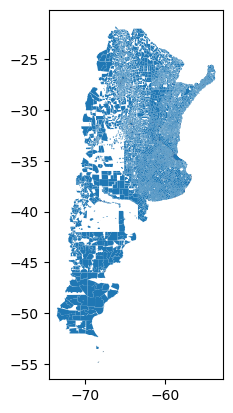

In [299]:
results.plot()

In [306]:
censo10_IGN_ref.columns

Index(['codprov', 'coddepto', 'circuito', 'IN1', 'NAM', 'geometry'], dtype='object')

In [314]:
results.shape

(51940, 7)

In [312]:
results.merge(censo10_IGN_ref[['PROV_', 'DEPTO_', 'IN1', 'NAM']].drop_duplicates()).shape


(51940, 9)

In [315]:
results[['PROV_', 'DEPTO_']].drop_duplicates().shape

(525, 2)

In [316]:
results[['codprov', 'coddepto']].drop_duplicates().shape

(526, 2)

In [313]:
results.merge(ref[['codprov', 'coddepto', 'IN1', 'NAM']].drop_duplicates()).shape

(51940, 9)

In [317]:
results = results.merge(ref[['codprov', 'coddepto', 'IN1', 'NAM']].drop_duplicates())

In [300]:
# results.to_file('./info/radio_circ_IGN.geojson', driver = 'GeoJSON')

In [318]:
results.drop('geometry', axis = 1).to_csv('./info/radio_circ_IGN.csv', index = False)

In [319]:
results.head()

,PROV_,DEPTO_,COD_2010,codprov,coddepto,circuito,geometry,IN1,NAM
0,02,013,020130101,01,013,00134,"POLYGON Z ((-58.47254 -34.53737 0.00000, -58.4...",02091,Comuna 13
1,02,013,020130102,01,013,00134,"POLYGON Z ((-58.47030 -34.53644 0.00000, -58.4...",02091,Comuna 13
2,02,013,020130103,01,013,00134,"POLYGON Z ((-58.46836 -34.53548 0.00000, -58.4...",02091,Comuna 13
3,02,013,020130104,01,013,00134,"POLYGON Z ((-58.46794 -34.53643 0.00000, -58.4...",02091,Comuna 13
4,02,013,020130105,01,013,00134,"POLYGON Z ((-58.46631 -34.53668 0.00000, -58.4...",02091,Comuna 13


In [ ]:
xx

In [230]:
# ref.loc[ref.IN1 == '82084']

In [232]:
# codprov	coddepto con mas de un depto IGN:

# Lugares que bordean con otros deptos y pueden dar lugar a error. Circuitos con depto incorrecto.
# duplicates = df.groupby(['codprov', 'coddepto']).agg({'IN1' : ['nunique', 'unique'], 'NAM': 'unique'}).sort_values(('IN1', 'nunique')).tail(20)
# duplicates


In [ ]:
## Asignamos radios y circuitos espacialmente a los departamentos de IGN. Para evitar todo tipo de problemas con los codigos de deptos.

In [ ]:
xx

In [ ]:
circuitos_ARG.count()

circuito    5589
codprov     5563
coddepto    5563
seccion     1066
geometry    5559
dtype: int64

In [ ]:
circuitos_ARG.nunique()

circuito    2058
codprov       24
coddepto     138
seccion        8
geometry    5550
dtype: int64

In [ ]:
## Agregar codigos de provincia de INDEC
codprovs = pd.read_csv('./codprovs.csv', dtype = 'str')
codprovs['codprov'] = codprovs['codprov'].str.zfill(2)

circuitos_ARG = circuitos_ARG.merge(codprovs, how = 'left')

In [ ]:

result_list = []

for indec_p in circuitos_ARG.indec_p.dropna().unique():
    cne_prov = circuitos_ARG.loc[circuitos_ARG.indec_p.fillna(indec_p) == indec_p]
    cne_prov = fix_geom(cne_prov.dropna(subset = 'geometry'))
    print(cne_prov.nomprov.unique())

    radios_prov = radios.loc[radios.PROV_ == indec_p]

#     ## Correccion de errores
#     radios_prov.loc[radios_prov.IN1 == '26028', 'DEPTO_'] = '063' # Esto es para adaptarse a un erorr en CNE
# #             (la CNE tiene unido camarones al dpto martires, por error)

    result_prov = []

#     for dpto in cne_prov.indec_d.unique():

#         if (cne_prov.indec_p.unique()[0] == '94') | (cne_prov.indec_p.unique()[0] == '22'):
# #                     print('chaco o tdf')
#             radios_dpto = radios_prov # En chaco y tdf, usar toda la provincia porque los codigos estan cambiados...
#         else:
#             radios_dpto = radios_prov.loc[radios_prov.DEPTO_ == dpto]

# #         circ_dpto = cne_prov.loc[cne_prov.indec_d == dpto]

# #     Check...
#     fig, axs = plt.subplots(1)
#     radios_prov.plot(ax = axs, alpha = .4)
#     cne_prov.plot(ax = axs, alpha = .4)
#     plt.show()

    ## Intersectar los radios en cuestion con los polis de IGS.
    overlay = gpd.overlay(radios_prov, cne_prov[['circuito', 'codprov', 'coddepto', 'geometry']], how='intersection')
    
    
    if len(overlay) != 0: # Si hay interseccion
        overlay['area'] = overlay.area

        year = '2010'
        # Quedarse con el que mas interseca (el radio se asigna al depto donde este mayor parte de su area.)
        radios_in_circu = overlay.groupby(['PROV_', 'DEPTO_', 'FRACC_', 'COD_'+year]
                                        ).apply(lambda x: x.nlargest(1, 'area')).reset_index(drop = True
                    )[['codprov', 'coddepto', 'PROV_', 'DEPTO_', 'FRACC_', 'COD_'+year, 'IN1', 'circuito']]
        
        # radios_in_circu['FRACC_2'] = radios_in_circu['COD_'+year].str[5:7]
        result_prov += [radios_in_circu]
    else:
#             print('sin interseccion en '+str(circ_dpto.departamen.unique()[0]))
        print('sin interseccion en '+str(cne_prov.nomprov.unique()[0]))

    result_prov = pd.concat(result_prov)

    ## Tomar radios que se asociaron a mas de 1 circuito.
#     Esto pasa cuando se usa la provincia entera para intersecar (ie. chaco, tdf)
    duplicados = result_prov[result_prov.duplicated('COD_2010', keep = False)].sort_values('COD_2010')

    if len(duplicados) > 0:

        ## Volcarlos en 1 solo circuito.
        overlay = gpd.overlay(gpd.GeoDataFrame(duplicados.drop('circuito', axis = 1).merge(radios)), 
                             gpd.GeoDataFrame(duplicados.merge(cne_prov))[['circuito', 'geometry']], how='intersection')

        if len(overlay) != 0: # Si hay interseccion
            overlay['area'] = overlay.area

            year = '2010'
            # Quedarse con el que mas interseca (el radio se asigna al depto donde este mayor parte de su area.)
            res_dup_prov = overlay.groupby(['PROV_', 'DEPTO_', 'FRACC_', 'COD_'+year]
                                        ).apply(lambda x: x.nlargest(1, 'area')
                                               ).reset_index(drop = True)[['PROV_', 'DEPTO_', 'FRACC_', 'COD_'+year, 'IN1', 'circuito']]
        result_prov = pd.concat([result_prov[~result_prov.duplicated('COD_2010', keep = False)], res_dup_prov])

    result_list += [result_prov]

circs_dpto_IGN = pd.concat(result_list).drop_duplicates()


['Ciudad Autónoma de Buenos Aires' nan]
['Catamarca' nan]
['Chaco' nan]
['Chubut' nan]
['Córdoba' nan]
['Corrientes' nan]
[nan 'Entre Ríos']
[nan 'Formosa']
[nan 'Jujuy']
[nan 'La Pampa']
[nan 'La Rioja']
[nan 'Mendoza']
[nan 'Misiones']
[nan 'Neuquén']
[nan 'Buenos Aires']
[nan 'Río Negro']
[nan 'Salta']
[nan 'San Luis']
[nan 'Santa Cruz']
[nan 'Santa Fe']
[nan 'Santiago del Estero']
[nan 'San Juan']
[nan 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']
[nan 'Tucumán']


In [ ]:
radios.nunique()

PROV_          24
DEPTO_        154
FRACC_         99
COD_2010    52401
IN1           525
geometry    52401
dtype: int64

In [ ]:
circs_dpto_IGN.nunique()

codprov        24
coddepto      138
PROV_          24
DEPTO_        154
FRACC_         99
COD_2010    52159
IN1           525
circuito     1974
dtype: int64

In [ ]:
# Esto es lo extraido de la base
# seccion_dpto = pd.read_csv('./../elecciones-ARG/datos/BD/seccion_table.csv', dtype = 'str')
# seccion_dpto['distrito_id'] = seccion_dpto['distrito_id'].str.zfill(2)
# seccion_dpto['seccion_id'] = seccion_dpto['seccion_id'].str.zfill(3)
# seccion_dpto.nunique()

## Este archivo esta basado en lo extraido de la base, pero trae los codigos usados en INDEC, etc (PROV_, DEPTO_)
# result = pd.read_csv('./info/radios_circuitos-TTGL.csv', dtype= 'str')
secciones_dptos_ref = pd.read_csv('./info/secciones_dptos_ref.csv')

In [ ]:
secciones_dptos_ref = secciones_dptos_ref.dropna()
secciones_dptos_ref['PROV_'] = secciones_dptos_ref.IDPROV.astype(int).astype(str).str.zfill(2)
secciones_dptos_ref['DEPTO_'] = secciones_dptos_ref.IDDPTO.astype(int).astype(str).str.zfill(3)

In [ ]:
claves = secciones_dptos_ref[['PROV_', 'DEPTO_', 'distrito_id', 'seccion_id', 'seccionprovincial_id', 'seccion_nombre']]
claves.head()

,PROV_,DEPTO_,distrito_id,seccion_id,seccionprovincial_id,seccion_nombre
0,02,001,1,1,0,Comuna 01
1,02,002,1,2,0,Comuna 02
2,02,003,1,3,0,Comuna 03
3,02,004,1,4,0,Comuna 04
4,02,005,1,5,0,Comuna 05


In [ ]:
circs_dpto_IGN.head()

,codprov,coddepto,PROV_,DEPTO_,FRACC_,COD_2010,IN1,circuito
0,01,001,02,001,01,020010101,0214007,00005
1,01,001,02,001,02,020010201,0214007,00005
2,01,001,02,001,02,020010202,0214007,00005
3,01,001,02,001,02,020010203,0214007,00005
4,01,001,02,001,02,020010204,0214007,00005


In [ ]:
result_c = circs_dpto_IGN.merge(claves)

In [96]:
# result_c.to_csv('./info/radios_circuitos_secciones_ref.csv', index = False)  #### Hay problema con IN1... a revisar. O bien en el codigo que sigue debajo.

In [121]:
result_c.drop('IN1', axis = 1).to_csv('./../elecciones-ARG/datos/censo/radios_circuitos_secciones_ref.csv', index = False)

In [131]:
circs_dpto_IGN[['codprov', 'coddepto', 'PROV_', 'DEPTO_']].drop_duplicates()

,codprov,coddepto,PROV_,DEPTO_
0,01,001,02,001
329,01,002,02,002
527,01,003,02,003
781,01,004,02,004
1033,01,005,02,005
...,...,...,...,...
1474,23,016,90,105
1597,23,014,90,112
1641,23,015,90,119
1647,23,016,90,119


In [125]:
result_c.drop('IN1', axis = 1).head()

,codprov,coddepto,PROV_,DEPTO_,FRACC_,COD_2010,circuito,distrito_id,seccion_id,seccionprovincial_id,seccion_nombre
0,01,001,02,001,01,020010101,00005,1,1,0,Comuna 01
1,01,001,02,001,02,020010201,00005,1,1,0,Comuna 01
2,01,001,02,001,02,020010202,00005,1,1,0,Comuna 01
3,01,001,02,001,02,020010203,00005,1,1,0,Comuna 01
4,01,001,02,001,02,020010204,00005,1,1,0,Comuna 01


In [128]:
result_c[['codprov', 'coddepto', 'PROV_', 'DEPTO_', 'distrito_id', 'seccion_id', 'seccion_nombre']].drop_duplicates()



,codprov,coddepto,PROV_,DEPTO_,distrito_id,seccion_id,seccion_nombre
0,01,001,02,001,1,1,Comuna 01
329,01,002,02,002,1,2,Comuna 02
527,01,003,02,003,1,3,Comuna 03
781,01,004,02,004,1,4,Comuna 04
1033,01,005,02,005,1,5,Comuna 05
...,...,...,...,...,...,...,...
51916,23,016,90,105,23,16,Tafí Viejo
52039,23,014,90,112,23,14,Trancas
52083,23,015,90,119,23,15,Yerba Buena
52089,23,016,90,119,23,15,Yerba Buena


In [ ]:
xx

## Codprov - Coddepto - IN1

In [ ]:
pd.options.display.max_rows = 99

In [ ]:
## Cuando codprov y coddpto tienen mas de un IN1, elegir el que mas radios tiene en la interseccion.

prov_dpto_nuniques = circs_dpto_IGN.groupby(['codprov', 'coddepto', 'IN1']).nunique().reset_index()
prov_dpto_nuniques['pct'] = prov_dpto_nuniques.groupby(['codprov', 'coddepto'])['COD_2010'].apply(lambda x: x/x.sum()).round(2)
prov_dpto_nuniques['test'] = abs(prov_dpto_nuniques['pct'] - .5)

# test.sort_values('test').head(20).sort_values('IN1')

TypeError: incompatible index of inserted column with frame index

In [ ]:
## Lezama y Chascomus
prov_dpto_nuniques.loc[prov_dpto_nuniques.IN1 == '06217']

: 

In [ ]:
## Tierra del Fuego
prov_dpto_nuniques.loc[prov_dpto_nuniques.IN1.str[:2] == '94']

: 

In [ ]:
prov_dpto_IN1 = prov_dpto_nuniques.groupby(['codprov', 'coddepto']).apply(lambda x: x.nlargest(1, 'COD_2010')).reset_index(drop = True)

prov_dpto_IN1[['codprov', 'coddepto', 'IN1']].to_csv('./info/secciones_departamentos-TTGL.csv', index = False)

: 

In [ ]:
prov_dpto_IN1[['codprov', 'coddepto', 'IN1']].head()

: 

## Unir secciones a departamentos IGN

In [ ]:
import geopandas as gpd

# Unir secciones a departamentos IGN
radios_diss_IN1 = radios.copy()
radios_diss_IN1['geometry'] = radios_diss_IN1.buffer(0.001)
radios_diss_IN1 = radios_diss_IN1.dissolve('IN1').reset_index()[['IN1', 'geometry']]

# Si bien en teoria este dissolve nos daria los departmantos, el archivo de radios IGN tiene varios faltantes y errores.
# Por eso es mejor hacer spatial join de los radios disueltos, con la fuente de DPTOS.

: 

### Radios de IGN en DPTOS y PROVS de IGN

In [ ]:
## Si este paso falla, se pueden bajar manualmente los archivos y abrirlos localmente.

try: 
    dptos_url = u'https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcación/Límites/departamento/json'
    dptos_IGN = gpd.read_file(dptos_url)

    # Agregar código y nombres de provincia
    provs_url = 'https://dnsg.ign.gob.ar/apps/api/v1/capas-sig/Geodesia+y+demarcación/Límites/provincia/json'
    provs_IGN = gpd.read_file(provs_url)

except:
    dptos_IGN = gpd.read_file('./datos/departamento.json')
    provs_IGN = gpd.read_file('./datos/provincia.json')


: 

In [ ]:

dptos_IN1_from_radios = radios_diss_IN1

overlay = gpd.overlay(dptos_IGN[['nam', 'in1', 'geometry']], dptos_IN1_from_radios, how='intersection')
overlay['area'] = overlay.area

overlay = overlay.groupby(['nam', 'in1']).apply(lambda x: x.nlargest(1, 'area')).reset_index(drop=True)

provnames = provs_IGN.rename(columns={'in1': 'in1prov', 'nam': 'namprov'})[['in1prov', 'namprov']]
overlay['in1prov'] = overlay['in1'].str[:2]
overlay = overlay.merge(provnames, on='in1prov')

overlay.head()

: 

In [ ]:
# Lugares con código diferente (in1, de radios IGN, vs. IN1 de departamentos IGN)
# Son las comunas de CABA, además de Lezama-Chascomús y Tierra del Fuego
overlay.loc[overlay.in1 != overlay.IN1].sort_values('in1')

: 

### Guardar los resultados

In [ ]:
# Geojson
overlay[['in1prov', 'namprov', 'in1', 'nam', 'IN1', 'geometry']].to_file('./mapaelectoral/ref-dptosIGN.geojson', driver='GeoJSON')

# CSV
overlay[['in1prov', 'namprov', 'in1', 'nam', 'IN1']].to_csv('./info/ref-dptosIGN.csv', index=False)

: 

: 